In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

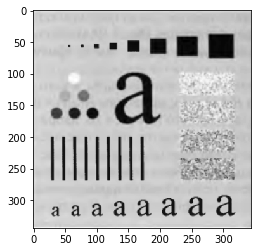

In [2]:
img = cv2.imread('source.png', 0)
width, height = img.shape
plt.imshow(img, cmap="gray")


In [3]:
def distance(u, v, width, height):
    return (((u - width / 2)**2) + (v - height / 2) ** 2) ** (1/2)

In [4]:
def ideal_low_filter(D0):
    ideal_low = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            if distance(x, y, width, height) <= D0:
                ideal_low[x][y] = 1
    return ideal_low

In [5]:
def ideal_high_filter(D0):
    ideal_high = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            if distance(x, y, width, height) > D0:
                ideal_high[x][y] = 1
    return ideal_high

In [6]:
def batervort_formula(x, y, width, height, D0, n):
    return 1 / ((1 + distance(x, y, width, height) / D0)**(2*n))

In [7]:
def batervort_filter_low(D0, n):
    batervort_low = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            batervort_low[x][y] = batervort_formula(x, y, width, height, D0, n)
    return batervort_low

In [8]:
def batervort_filter_high(D0, n):
    batervort_high = np.zeros((height, width), np.float32)
    for x in range(width):
        for y in range(height):
            batervort_high[x][y] = 1 - batervort_formula(x, y, width, height, D0, n)
    return batervort_high

In [9]:
# Вынести формулы из преобразования. Сделать явное сравнение с Янкиными хуйнями

In [10]:
def gauss_formula(x, y, width, height, d):
    return math.exp((-1*distance(x,y,width,height)**2)/d)

In [11]:
def gauss_filter_low(D0):
    gauss_low = np.zeros((width, height), np.float32)
    for x in range(width):
        for y in range(height):
            d = D0 ** 2
            d *= 2
            gauss_low[x][y] = gauss_formula(x, y, width, height, d)
    return gauss_low


In [12]:
def gauss_filter_high(D0):
    gauss_high = np.zeros((width, height), np.float32)
    for x in range(width):
        for y in range(height):
            d = D0 ** 2
            d *= 2
            gauss_high[x][y] = 1 - gauss_formula(x, y, width, height, d)
    return gauss_high

In [13]:
def calculate_spectrum(img):
    fft = np.fft.fft2(img) # fourier transform
    fft_shift = np.fft.fftshift(fft) # array shift into center of spectrum
    return fft_shift

def change_spectrum(img, mask):
    fshift = img * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_ifft = np.fft.ifft2(f_ishift) # backwards fourier transform
    return fshift, img_ifft

def show_spectrum(img):
    spectrum_magnitude = np.abs(img) ** (0.1)
    plt.imshow(spectrum_magnitude, cmap='gray')
    
def show_img(img):
    img_filt = np.abs(img)
    img_filt -= img_filt.min()
    img_filt = img_filt * 255 / img_filt.max()
    img_filt = img_filt.astype(np.uint8)
    plt.imshow(img_filt, cmap='gray')
#     return img_filt

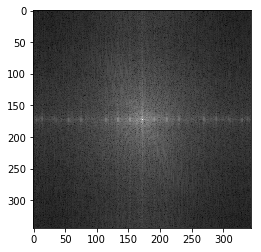

In [14]:
spectrum = calculate_spectrum(img)
show_spectrum(spectrum)

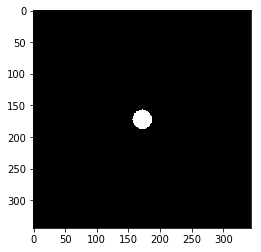

In [15]:
D = 15
n = 2

ideal_low_filter_ILFF = ideal_low_filter(D)
show_spectrum(ideal_low_filter_ILFF)

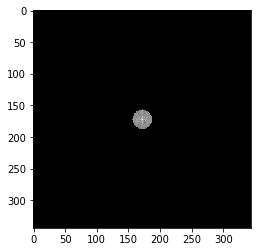

In [17]:
spectrum_back_ideal_low_filter, img_back_ideal_low_filter = change_spectrum(spectrum, ideal_low_filter_ILFF)
show_spectrum(spectrum_back_ideal_low_filter)

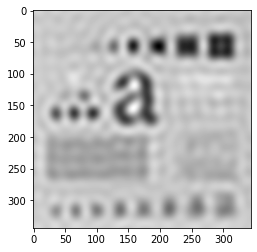

In [85]:
#обратное преобразование Фурье
show_img(img_back_ideal_low_filter)

In [89]:
# IDEAL HIGH FILTER
# todo pososi potom prosi (add dynamic D param changing)

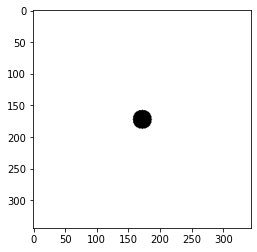

In [91]:
ideal_high_filter_IHHF = ideal_high_filter(D)
show_spectrum(ideal_high_filter_IHHF)

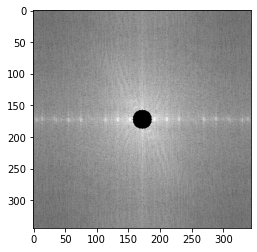

In [93]:
spectrum_back_ideal_high_filter, img_back_ideal_high_filter = change_spectrum(spectrum, ideal_high_filter_IHHF)
show_spectrum(spectrum_back_ideal_high_filter)

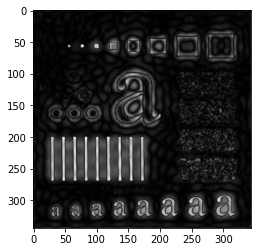

In [94]:
#обратное преобразование Фурье
show_img(img_back_ideal_high_filter)

In [ ]:
# BATERVORT

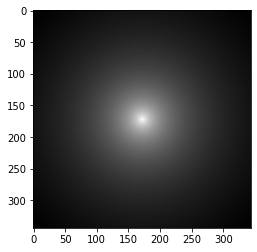

In [130]:
D = 20
n = 2
batervort_filter_l = batervort_filter_low(D, n)
show_spectrum(batervort_filter_l)


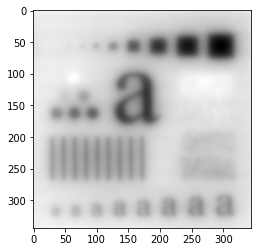

In [131]:
spectrum_back_batervort_filter_l, img_back_batervort_filter_l = change_spectrum(spectrum, batervort_filter_l)
show_spectrum(spectrum_back_batervort_filter_l)
show_img(img_back_batervort_filter_l)

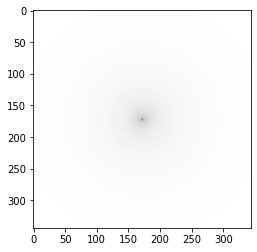

In [136]:
D = 40
n = 1/2
batervort_filter_h = batervort_filter_high(D, n)
show_spectrum(batervort_filter_h)

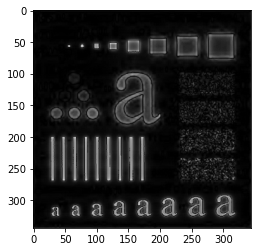

In [137]:
spectrum_back_batervort_filter_h, img_back_batervort_filter_h = change_spectrum(spectrum, batervort_filter_h)
show_spectrum(spectrum_back_batervort_filter_h)
show_img(img_back_batervort_filter_h)

In [113]:
# GAUSS

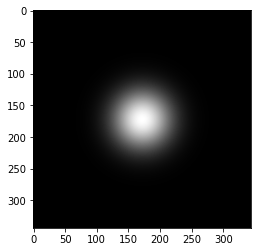

In [145]:
D=10
gauss_filter_l = gauss_filter_low(D)
show_spectrum(gauss_filter_l)

In [ ]:
spectrum_back_gauss_filter_l, img_back_batervort_filter_h = change_spectrum(spectrum, batervort_filter_h)
show_spectrum(spectrum_back_batervort_filter_h)
show_img(img_back_batervort_filter_h)

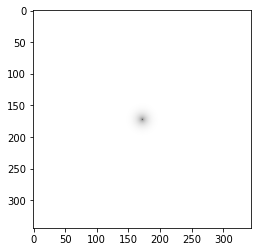

In [146]:
gauss_filter_h = gauss_filter_high(D)
show_spectrum(gauss_filter_h)

In [23]:
l = []
l += 2*['D=15','D=30','D=80']
l

['D=15', 'D=30', 'D=80', 'D=15', 'D=30', 'D=80']

In [24]:
2 * ['spectrum']

['spectrum', 'spectrum']

In [25]:
3 * ['D=15','D=30','D=80'] 

['D=15', 'D=30', 'D=80', 'D=15', 'D=30', 'D=80', 'D=15', 'D=30', 'D=80']

In [26]:
image_types = 6 * ['spectrum'] + 3 * ['spectrum_img']
image_types

['spectrum',
 'spectrum',
 'spectrum',
 'spectrum',
 'spectrum',
 'spectrum',
 'spectrum_img',
 'spectrum_img',
 'spectrum_img']